<a href="https://colab.research.google.com/github/pragyas503/Play-Store-App-Review-Analysis/blob/main/Play_store_data_analysis_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b> Problem Statement: </b>
### <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

### <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

### <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

### <b> Data Exploration </b>



Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "drive/My Drive/Colab_Notebooks/AlmaBetter/Capstone_project_EDA_Playstore/Play Store Data.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Creating a function to get more useful information about the different attributes of the dataset

In [ ]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [ ]:
df.shape

(10841, 13)

Missing Data Visualisation

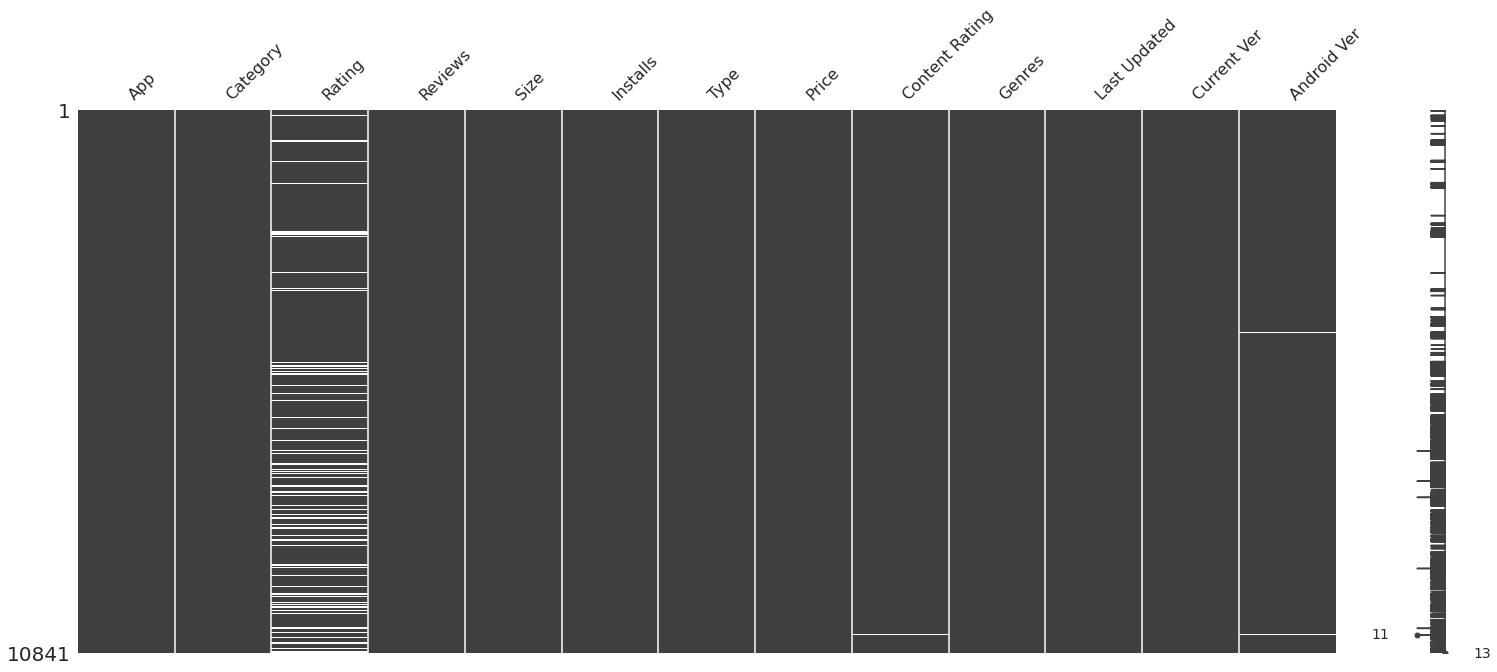

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

Check for Duplicates

In [ ]:
df.duplicated().sum()

483

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(10358, 13)

### <b >Data Cleaning

In [ ]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Number of no-data values in dataframe

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Cleaning and replacing NaN values

Removing 'NaN' form ***'Rating'*** Column, by replacing mean value

In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
df['Rating'].mean()

4.189542336669291

In [ ]:
df['Rating'].fillna(df['Rating'].mean(), inplace= True)

Removing 'NaN' from **'Type'** column, by replacing mode value

In [ ]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.189542,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
df['Type'].value_counts()

Free    9591
Paid     765
0          1
Name: Type, dtype: int64

Since most of the apps are free, we can use mode to fill the NaN value

In [ ]:
df['Type'].mode()

0    Free
dtype: object

In [ ]:
df['Type'].fillna(df['Type'].mode()[0], inplace= True)

Removing 'NaN' form **'Content Rating'** Column

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The row is shifted and the catagory is not clear so we can dropthis row completely. Also we can use pd.shift() function to shift our rows, but we don't know the catagory as well, thus we are dropping this row completely. 

In [ ]:
df.dropna(subset= ['Content Rating'], inplace= True)

In [ ]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**Dropping the unnecessary columns which will be of not much use in the analysis process.** 

In [ ]:
df.drop(['Last Updated','Current Ver', 'Android Ver'], axis=1, inplace= True)

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,40
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Columns like Reviews, Size, Installs, & Price should have an int or float datatype, But here we can see of object type, So let’s convert them to their respective correct type.

Converting **'Reviews'** column to int datatype.

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df['Reviews']= df['Reviews'].astype('int')

Converting **'Size'** column to float datatype.

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Need to remove 'M' and 'k' and and keeping data in terms of kilobytes

In [ ]:
k = df[df['Size'].apply(lambda x : list(x)[-1] == 'k')]
k['Size'] = k['Size'].apply(lambda x : "".join(list(x)[:-1]))
k['Size'] = k['Size'].astype(float)
k['Size'] = k['Size'] / 1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
m = df[df['Size'].apply(lambda x : list(x)[-1] == 'M')]
m['Size'] = m['Size'].apply(lambda x : "".join(list(x)[:-1]))
m['Size'] = m['Size'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
size_df = pd.concat([k, m ])
size_df['Size'] = size_df['Size'].astype(float)

Replacing the 'Varies with device' values in 'Size' column with NaN.



In [ ]:
(df['Size']=='Varies with device').sum()

1526

In [ ]:
df['Category'][df['Size']=='Varies with device']

37            ART_AND_DESIGN
42            ART_AND_DESIGN
52         AUTO_AND_VEHICLES
67         AUTO_AND_VEHICLES
68         AUTO_AND_VEHICLES
                ...         
10713                WEATHER
10725    MAPS_AND_NAVIGATION
10765                 SOCIAL
10826                 SOCIAL
10839    BOOKS_AND_REFERENCE
Name: Category, Length: 1526, dtype: object

"varies with device" is distributed across different categories. We will find the mean of each category and replae it with "varies with device" sizes.

In [ ]:
size_dict = size_df.groupby('Category').mean().to_dict()['Size']

creating vwd dataframe containing all values 'Varies with device', and replacing this with the mean size of that category. 

In [ ]:
vwd = df[df['Size'] == 'Varies with device']
vwd['Size'] = vwd['Category'].map(size_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mearging all three vwd,k, and M into new_df dataframe

In [ ]:
new_df = pd.concat([vwd, k, m])

In [ ]:
new_df = new_df.reset_index().sort_values(by='index', ascending=True)

In [ ]:
new_df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1841,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,"10,000+",Free,0,Everyone,Art & Design
1842,1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
1843,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000,"5,000,000+",Free,0,Everyone,Art & Design
1844,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,"50,000,000+",Free,0,Teen,Art & Design
1845,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...,...
10353,10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,"5,000+",Free,0,Everyone,Education
10354,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100+,Free,0,Everyone,Education
10355,10838,Parkinson Exercices FR,MEDICAL,4.189542,3,9.500000,"1,000+",Free,0,Everyone,Medical
1525,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,13.189959,"1,000+",Free,0,Mature 17+,Books & Reference


Copying new_df back to original df

In [ ]:
new_df.drop('index', axis=1, inplace=True)

In [ ]:
new_df.sort_index()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Floor Plan Creator,ART_AND_DESIGN,4.100000,36639,12.370968,"5,000,000+",Free,0,Everyone,Art & Design
1,Textgram - write on photos,ART_AND_DESIGN,4.400000,295221,12.370968,"10,000,000+",Free,0,Everyone,Art & Design
2,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.600000,17057,20.037147,"1,000,000+",Free,0,Everyone,Auto & Vehicles
3,Ulysse Speedometer,AUTO_AND_VEHICLES,4.300000,40211,20.037147,"5,000,000+",Free,0,Everyone,Auto & Vehicles
4,REPUVE,AUTO_AND_VEHICLES,3.900000,356,20.037147,"100,000+",Free,0,Everyone,Auto & Vehicles
...,...,...,...,...,...,...,...,...,...,...
10352,FR Forms,BUSINESS,4.189542,0,9.600000,10+,Free,0,Everyone,Business
10353,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,"5,000+",Free,0,Everyone,Education
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100+,Free,0,Everyone,Education
10355,Parkinson Exercices FR,MEDICAL,4.189542,3,9.500000,"1,000+",Free,0,Everyone,Medical


In [ ]:
df= new_df

In [ ]:
df= df.sort_index()

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Floor Plan Creator,ART_AND_DESIGN,4.100000,36639,12.370968,"5,000,000+",Free,0,Everyone,Art & Design
1,Textgram - write on photos,ART_AND_DESIGN,4.400000,295221,12.370968,"10,000,000+",Free,0,Everyone,Art & Design
2,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.600000,17057,20.037147,"1,000,000+",Free,0,Everyone,Auto & Vehicles
3,Ulysse Speedometer,AUTO_AND_VEHICLES,4.300000,40211,20.037147,"5,000,000+",Free,0,Everyone,Auto & Vehicles
4,REPUVE,AUTO_AND_VEHICLES,3.900000,356,20.037147,"100,000+",Free,0,Everyone,Auto & Vehicles
...,...,...,...,...,...,...,...,...,...,...
10352,FR Forms,BUSINESS,4.189542,0,9.600000,10+,Free,0,Everyone,Business
10353,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,"5,000+",Free,0,Everyone,Education
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100+,Free,0,Everyone,Education
10355,Parkinson Exercices FR,MEDICAL,4.189542,3,9.500000,"1,000+",Free,0,Everyone,Medical


Removing duplicated index

In [ ]:
df['Size'] = df['Size'].round(2)

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Floor Plan Creator,ART_AND_DESIGN,4.100000,36639,12.37,"5,000,000+",Free,0,Everyone,Art & Design
1,Textgram - write on photos,ART_AND_DESIGN,4.400000,295221,12.37,"10,000,000+",Free,0,Everyone,Art & Design
2,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.600000,17057,20.04,"1,000,000+",Free,0,Everyone,Auto & Vehicles
3,Ulysse Speedometer,AUTO_AND_VEHICLES,4.300000,40211,20.04,"5,000,000+",Free,0,Everyone,Auto & Vehicles
4,REPUVE,AUTO_AND_VEHICLES,3.900000,356,20.04,"100,000+",Free,0,Everyone,Auto & Vehicles
...,...,...,...,...,...,...,...,...,...,...
10352,FR Forms,BUSINESS,4.189542,0,9.60,10+,Free,0,Everyone,Business
10353,Sya9a Maroc - FR,FAMILY,4.500000,38,53.00,"5,000+",Free,0,Everyone,Education
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.60,100+,Free,0,Everyone,Education
10355,Parkinson Exercices FR,MEDICAL,4.189542,3,9.50,"1,000+",Free,0,Everyone,Medical


Cleaning **'Installs'** column

In [ ]:
df['Installs'].unique()


array(['5,000,000+', '10,000,000+', '1,000,000+', '100,000+', '500,000+',
       '100,000,000+', '1,000,000,000+', '50,000,000+', '500,000,000+',
       '10,000+', '50,000+', '500+', '1,000+', '5,000+', '10+', '1+',
       '100+', '50+', '5+', '0', '0+'], dtype=object)

Remove the '+' and ','  symbol from these values.

In [ ]:
df['Installs'] = df['Installs'].apply(lambda x: x.strip('+'))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ''))

In [ ]:
df['Installs'].unique()

array(['5000000', '10000000', '1000000', '100000', '500000', '100000000',
       '1000000000', '50000000', '500000000', '10000', '50000', '500',
       '1000', '5000', '10', '1', '100', '50', '5', '0'], dtype=object)

In [ ]:
df['Installs'] = df['Installs'].astype('int')

Cleaning **'Price'** Column. 

In [ ]:
df['Price'].unique()

array(['0', '$3.99', '$4.99', '$3.49', '$2.99', '$7.49', '$6.99', '$2.49',
       '$3.95', '$4.49', '$5.99', '$8.99', '$1.99', '$0.99', '$2.50',
       '$1.49', '$11.99', '$5.49', '$3.90', '$4.59', '$12.99', '$2.95',
       '$10.99', '$6.49', '$1.29', '$5.00', '$399.99', '$4.80', '$29.99',
       '$14.99', '$1.00', '$1.04', '$7.99', '$9.99', '$9.00', '$10.00',
       '$24.99', '$79.99', '$16.99', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$1.70', '$2.00', '$3.88', '$25.99',
       '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61',
       '$1.59', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$1.96', '$19.40',
       '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20'], dtype=object)

Need to remove $ sign, and convert it to float.

In [ ]:
df['Price']= df['Price'].apply(lambda x:x.strip('$'))
df['Price']=  df['Price'].astype(float)

In [ ]:
df['Price'].unique()

array([  0.  ,   3.99,   4.99,   3.49,   2.99,   7.49,   6.99,   2.49,
         3.95,   4.49,   5.99,   8.99,   1.99,   0.99,   2.5 ,   1.49,
        11.99,   5.49,   3.9 ,   4.59,  12.99,   2.95,  10.99,   6.49,
         1.29,   5.  , 399.99,   4.8 ,  29.99,  14.99,   1.  ,   1.04,
         7.99,   9.99,   9.  ,  10.  ,  24.99,  79.99,  16.99,   1.5 ,
        19.99,  15.99,  33.99,  74.99,  39.99,   1.7 ,   2.  ,   3.88,
        25.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,
         1.59,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   1.96,  19.4 ,  15.46,   3.04,   4.29,   2.6 ,   3.28,
         4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,
         3.61, 394.99,   1.26,   1.2 ])

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,12.37,5000000,Free,0.0,Everyone,Art & Design
1,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,12.37,10000000,Free,0.0,Everyone,Art & Design
2,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,20.04,1000000,Free,0.0,Everyone,Auto & Vehicles
3,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,20.04,5000000,Free,0.0,Everyone,Auto & Vehicles
4,REPUVE,AUTO_AND_VEHICLES,3.9,356,20.04,100000,Free,0.0,Everyone,Auto & Vehicles


In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,40
Reviews,int64,0,6001
Size,float64,0,309
Installs,int64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


### <b> Data Visualization

Understanding Top Categories among different categories.

In [ ]:
x= df['Category'].value_counts()
y= df['Category'].value_counts().index

x_axis= []
y_axis= []
for i in range(len(x)):
  x_axis.append(x[i])
  y_axis.append(y[i])

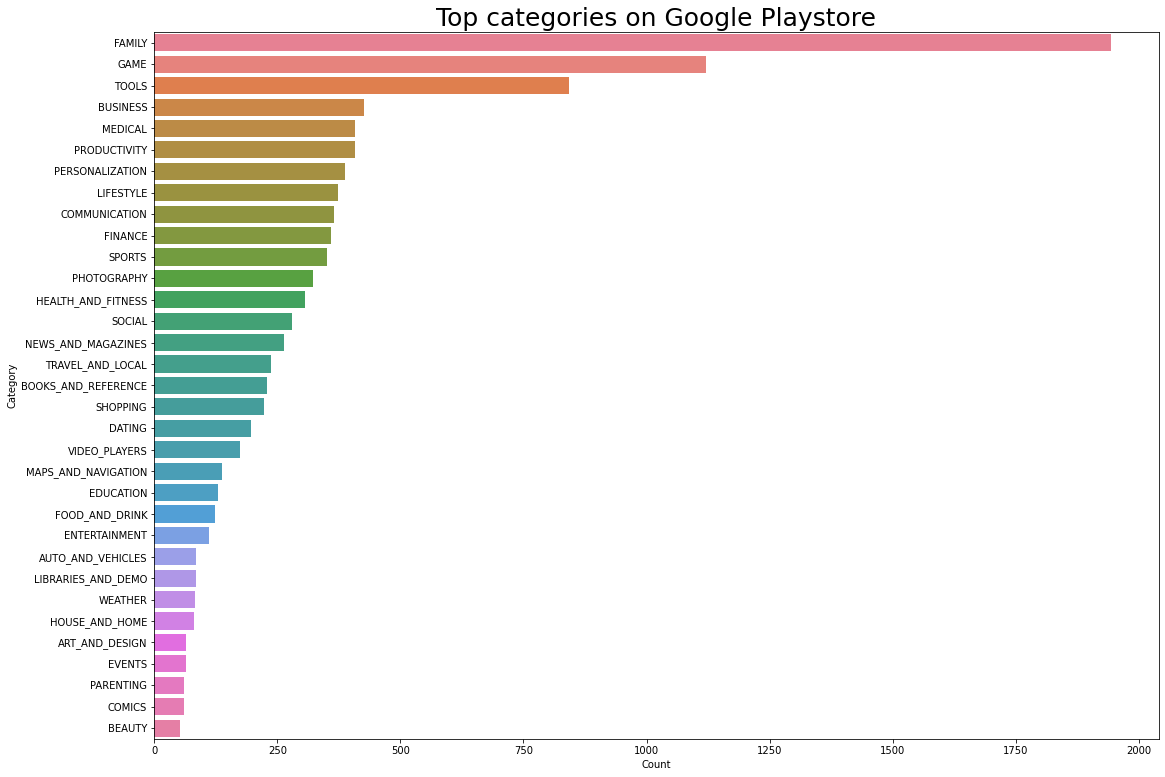

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = x_axis, y = y_axis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

There are total 33 categories in the dataset. From the above output we can come to the conclusion that, Top categories in the play store, which contains the highest number of apps are under Family & Game category And which contains the lowest number of apps are under Beauty & Comics Category

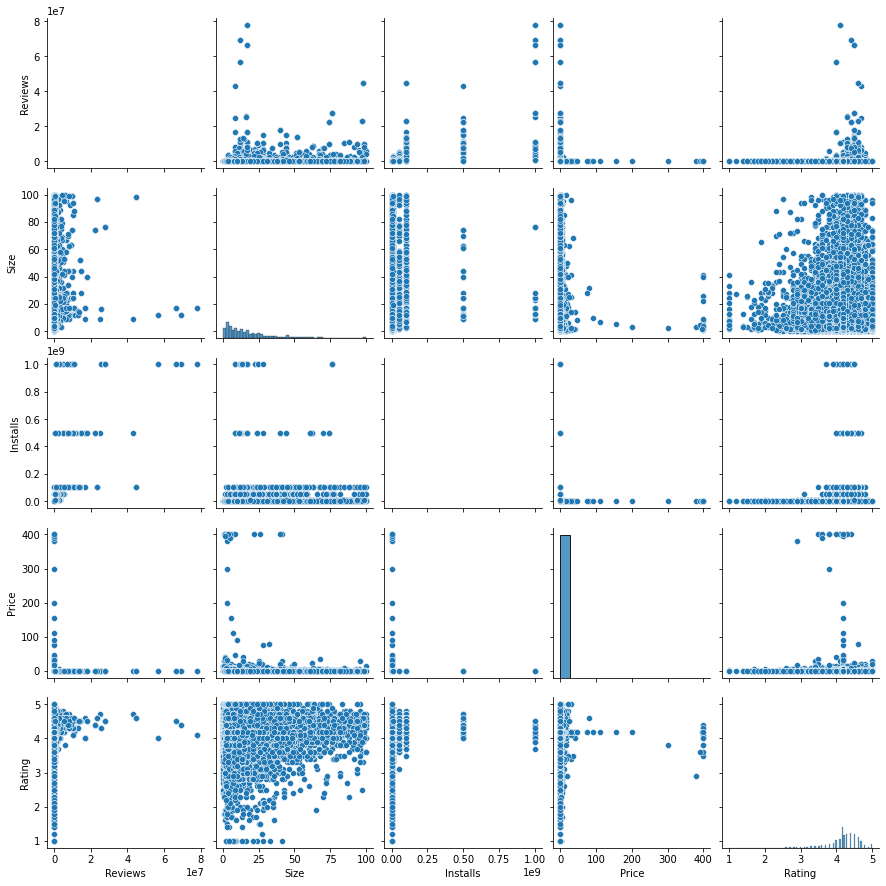

In [ ]:
sns.pairplot(df[['Reviews', 'Size','Installs', 'Price', 'Rating']])

We can quickly check the prominent corelations using pair plots.

*   Most high rating apps have more reviews. High rating apps gets more attention and reviews
*   Highly rated apps have more installs. High ratings would definitely make any app popular.
*  check Apps with poor ratings are more likely to be small in size. Larger size could mean the app is more fleshed out.
*   Apps with low price are more likely to be installed. Cheap and free apps seem to be a safe investment.

Category-wise Rating, Reviews, and Installs

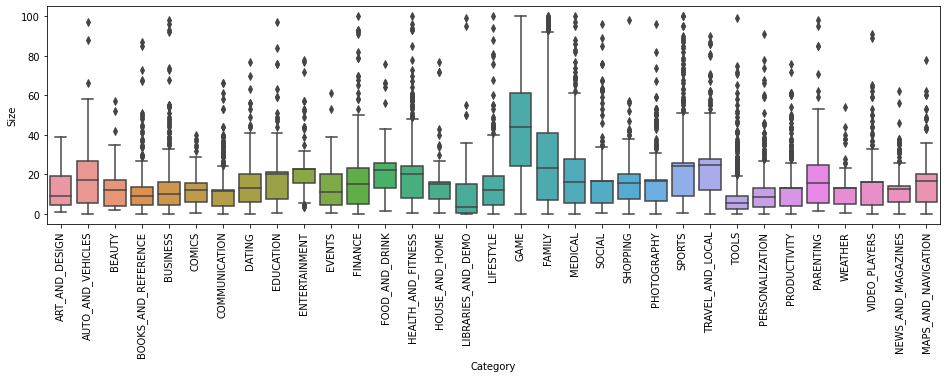

In [ ]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)

sns.boxplot(y='Size', x='Category', data=df)

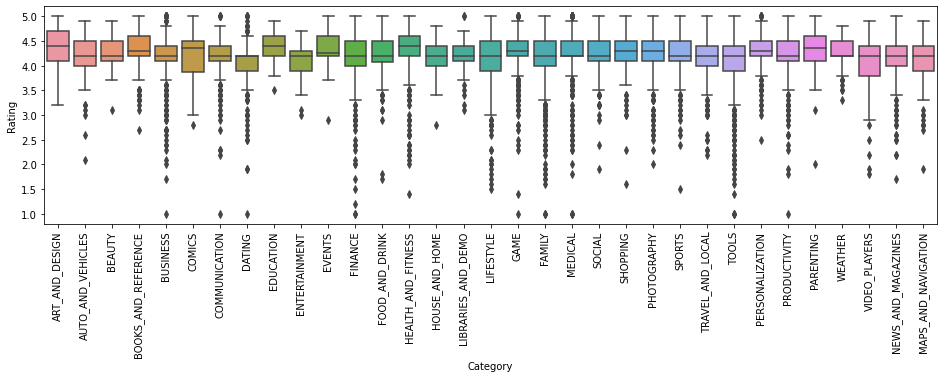

In [ ]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)

sns.boxplot(y='Rating', x='Category', data=df)

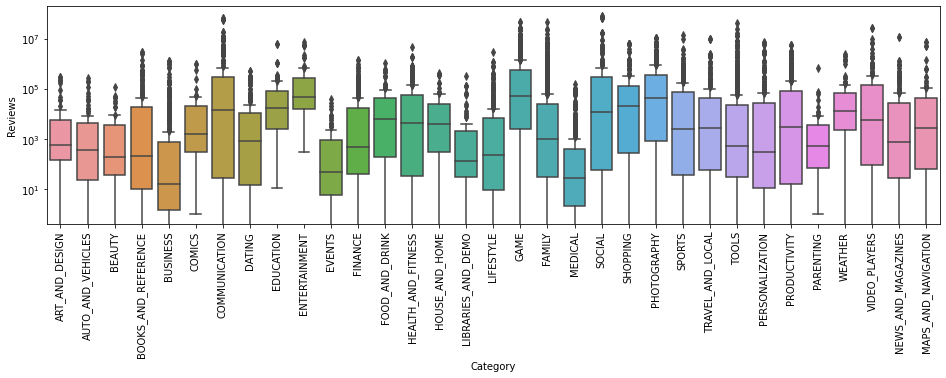

In [ ]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)

sns.boxplot(y='Reviews', x='Category', data=df)
plt.yscale('log')

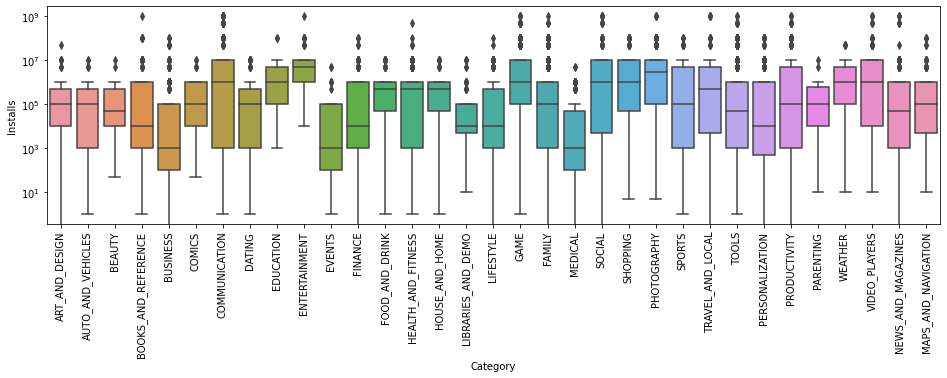

In [ ]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)

sns.boxplot(y='Installs', x='Category', data=df)
plt.yscale('log')

There are total 33 categories in the dataset. From the above output we can come to the conclusion that,
Top categories in the play store, which contains the highest number of apps are under Family & Game category
And which contains the lowest number of apps are under Beauty & Comics Category

In [ ]:
y= df[df['Type'] =='Paid']['Price']

In [ ]:
y.min()

0.99

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


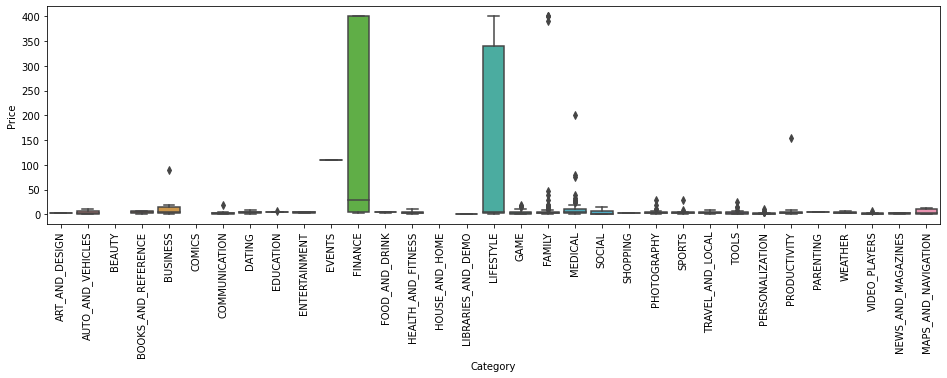

In [ ]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)

y= df[df['Type'] =='Paid']['Price']
x=df['Category']

sns.boxplot(x, y)



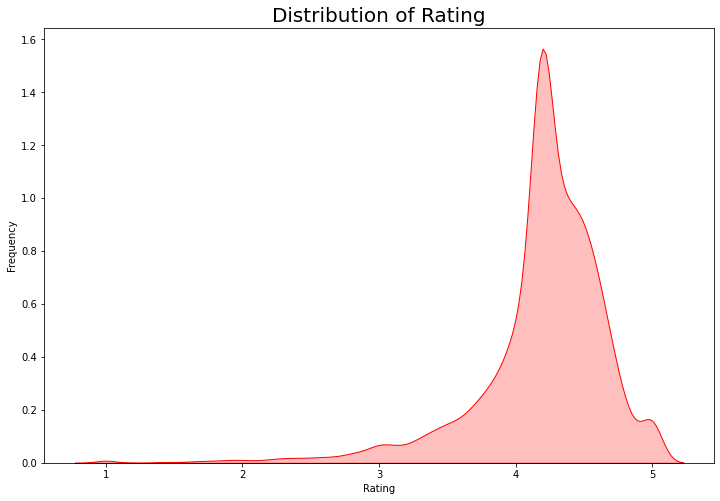

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Red", shade = True)
plt.title('Distribution of Rating',size = 20);

**Free Vs Paid Apps in store**

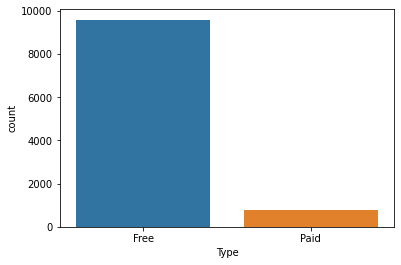

In [ ]:
sns.countplot(x='Type', data=df)

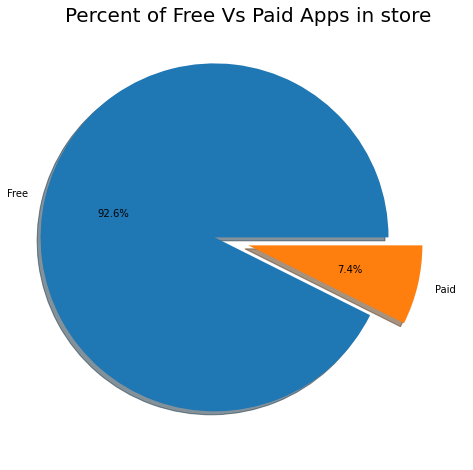

In [ ]:
plt.figure(figsize=(8,8))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()


Relation between different app Categories and Price

**Rating of Paid apps vs Free apps**

In [ ]:
data1= df[df['Type'] =='Paid']['Rating']
data2= df[df['Type'] =='Free']['Rating']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Frequency')

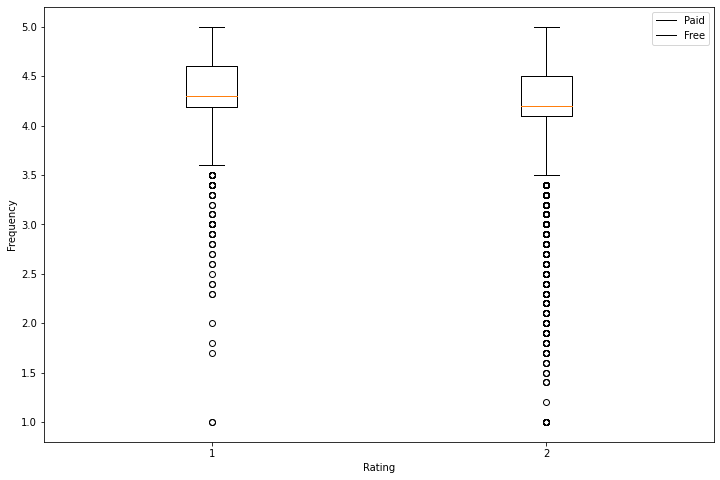

In [ ]:
Data=[data1,data2]
plt.figure(figsize=(12, 8))
plt.boxplot(Data)
plt.legend(['Paid','Free'])
plt.xlabel("Rating")
plt.ylabel("Frequency")

Paid apps have better rating

Content Rating from different age group

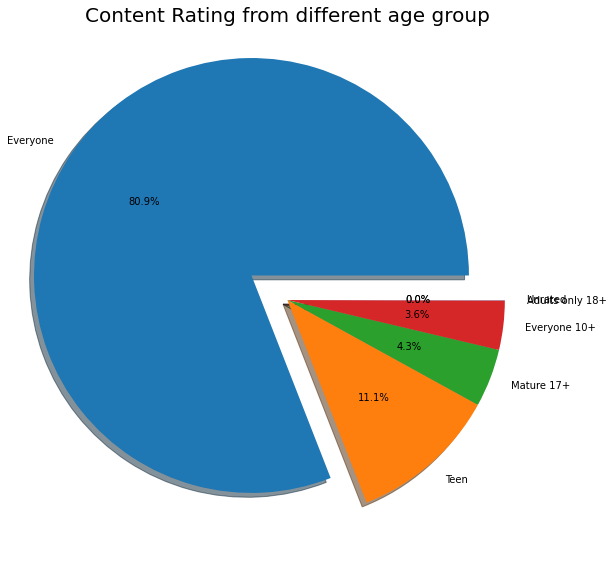

In [ ]:
plt.figure(figsize=(10,10))
labels = df['Content Rating'].value_counts(sort = True).index
sizes = df['Content Rating'].value_counts(sort = True)
explode = (0.2,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Content Rating from different age group',size = 20)
plt.show()

###**Sentiment analysis of user reviews**

In [ ]:
# Load user_reviews.csv

path = "drive/My Drive/Colab_Notebooks/AlmaBetter/Capstone_project_EDA_Playstore/User Reviews.csv"
df1 = pd.read_csv(path,delimiter=';')

In [ ]:
df1=df1.drop(df1.columns[[5, 6, 7, 8]],axis = 1)

In [ ]:
df1['Sentiment_Polarity']= pd.to_numeric(df1['Sentiment_Polarity'], errors='coerce')

In [ ]:
df1 = df1.dropna(subset=['Sentiment', 'Sentiment_Polarity', 'Translated_Review'])

In [ ]:
df1.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity     object
dtype: object

In [ ]:
# Join and merge the two dataframe
merged_df = pd.merge(df, df1, on ='App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])



In [ ]:
merged_df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,12.37,5000000,Free,0.0,Everyone,Art & Design,"I like features. It addictive! But, here's sug...",Positive,0.126190,0.5460317460317461
1,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,12.37,5000000,Free,0.0,Everyone,Art & Design,This like appetizer. It potential feels thin f...,Positive,0.238889,0.6972222222222223
2,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,12.37,5000000,Free,0.0,Everyone,Art & Design,"Stable app. Not intuitive, really cool learn m...",Positive,0.268750,0.459375
3,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,12.37,5000000,Free,0.0,Everyone,Art & Design,"Okey, I love decorating lot. I spend time usin...",Positive,0.238528,0.4601731601731602
4,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,12.37,5000000,Free,0.0,Everyone,Art & Design,"great, purchases restore switching new device?...",Positive,0.421591,0.6011363636363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53588,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.00,10000000,Free,0.0,Teen,Role Playing,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.7077777777777777
53589,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.00,10000000,Free,0.0,Teen,Role Playing,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.5053733766233766
53590,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.00,10000000,Free,0.0,Teen,Role Playing,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.39149659863945574
53591,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91.00,10000000,Free,0.0,Teen,Role Playing,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.72


merged_df

In [ ]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

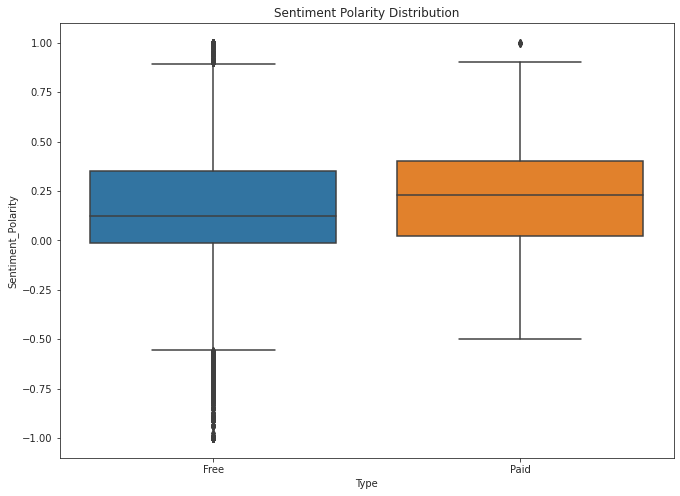

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x =merged_df['Type'], y =merged_df['Sentiment_Polarity'])
ax.set_title('Sentiment Polarity Distribution')